# Mouvement d'un point dans un potentiel quadratique

***

## Introduction

Un mobile de masse $m$ glisse le long d'un ﬁl dont l’équation est $y=f(x)$. 
Il n’est soumis qu’à la pesanteur. 

Le potentiel dû à la gravité est donc $mg[f(x)-f(x_0)]$

On définit l'origine en sorte que $f(x_0)=0$ et on suppose que la fonction $f$ présente un minimum en $x_0$. On peut alors développer la fonction $f$ en série au voisinage de zéro, pour définir le potentiel:

$$
\mathrm{V}(x) = \frac{mg}{2}\ddot{f}(0)x^2 + \mathrm{O}(x^3)\\
 = \frac{1}{2}m\omega^2x^2,
$$

En posant $\omega = \sqrt{\frac{g}{m}\ddot{f}(0)}$


Le Lagrangien s'écrit :
$$
\mathrm{L}(x, \dot{x}) = \frac{1}{2}m \dot{x}^2-\frac{1}{2}m \omega^2 x^2
$$
Et on aura pour l'équation de Lagrange  $$\frac{d}{dt}[\frac{\partial\mathrm{L}}{\partial\dot{x}}]=\frac{\partial\mathrm{L}}{\partial{x}}\implies \boxed{ \ddot{x}= -\omega^2 x}
$$


Equation dont la solution est de la forme $A sin(\omega t + \varphi)$ mais que l'on peut résoudre numériquement.




Supposons que les conditions initiales soient données par $x_0$ et $y_0$.
On aura:
\begin{eqnarray}
x_0 & = & Asin(\varphi) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (0a) \\
v_0 & = & \omega  Acos(\varphi), \;\;\;\;\;\;\;\;\;\;\; \;(0b)
\end{eqnarray}

D'où l'on déduit:
\begin{eqnarray}
\varphi & = & arctan\;(\omega \frac{x_0}{v_0}) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \\
A & = & \frac{x_0}{sin (\varphi)} , \;\;\;\;\;\;\;\;\;\;\; \;
\end{eqnarray}



## La méthode "leapfrog"

Pour éviter d'avoir' à résoudre une équation du second ordre, on va plutôt résoudre un système de deux équations du premier ordre :

\begin{eqnarray}
\frac{dx}{dt} & = & v \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1) \\
\frac{dv}{dt} & = & -\omega^2x, \;\;\;\;\;\;\;\;\;\;\; \;\; (2)
\end{eqnarray}

Le principe de l'intégration "saute-mouton" (leapfrog en Anglais) est de travailler alternativement sur la suite $x$ et la suite $v$. On transforme donc le système d'équations (1) (2) en :

\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{\Delta t} & = & v_{n+1} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (3) \\
\frac{v_{n+1}-v_{n}}{\Delta t} & = & -\omega^2x_n, \;\;\;\;\;\;\;\;\;\;\; \;(4)
\end{eqnarray}

Soit encore :
\begin{eqnarray}
x_{n+1} & = & x_{n}+v_{n+1}\Delta t \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (5) \\
v_{n+1} & = & v_{n} -\omega^2 \Delta t x_n, \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(6)
\end{eqnarray}


la période vaut  4.188786666666666


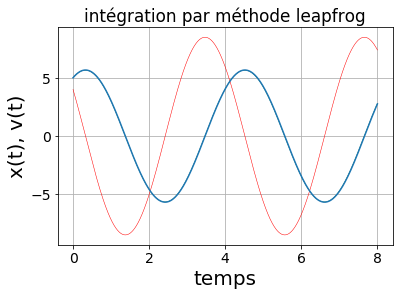

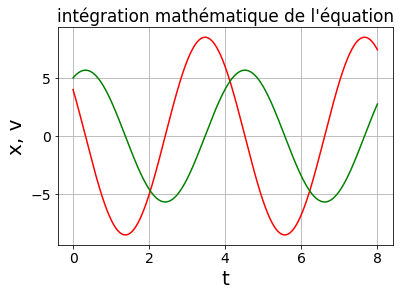

In [31]:
# Résolution de l'équation différentielle du second degré y"=-ky par la méthode leapfrog


from pylab import *
import matplotlib.pyplot as plt
###############################################################################
# définition du pas d'intégration N
N = 1000
tps=8.0
t = linspace(0,tps,N)
dt = t[1] - t[0]

###############################################################################
# création de la fonction resoudre
def resoudre(x0,v0):
    ###########################################################################
    # Initialisation à 0 des variables, et Conditions initiales
    x = zeros(N)
    v = zeros(N)
    x[0] = x0
    v[0] = v0
    
    ###########################################################################
    # Intégration "leapfrog"
        
    for i in range(N-1):
        v[i + 1] = v[i] - dt*x[i]*(omg)**2
        x[i + 1] = x[i] + dt*v[i + 1]
           
    ###########################################################################
    # Solution
    return x,v

###############################################################################
# retour au programme principal et assignation des quantités x0 & v0 (conditions initiales)
x0=5.0
omg=1.5
v0=4

T=2*3.14159/omg
print('la période vaut  '+ repr(T))

x,v = resoudre(x0,v0) 

##########################################################################
# résolution numérique directe
phi=math.atan(omg*x0/v0)
A=x0/sin(phi)

S=A*sin(phi+2*3.14*t/T)

COS=omg*A*cos(phi+2*3.14*t/T)



###############################################################################
# représentation graphique
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(t,x,'g',linewidth=0.5)
plt.plot(t,v,'r',linewidth=0.5)
plt.plot(t,S)
xlabel("temps")
ylabel("x(t), v(t)")
plt.title ("intégration par méthode leapfrog")

###############################################################################
show()
###############################################################################
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(t,COS,'r')
plt.plot(t,S,'g')
xlabel("t")
ylabel("x, v")
plt.title ("intégration mathématique de l'équation")

show()




## "temps de propagation" et "pas d'intégration"

On trouve effectivement des courbes présentant une allure en $Asin(\omega t + \phi)$, ainsi que le montre la courbe ci-dessus obtenue par calcul direct.

On doit remarquer que les équations du mouvement écrites sous leur forme (3)-(4) ci-dessus ne permettent un calcul effectif que dans la mesure où $\Delta t$ est petit, sachant que l'on a:

$$
\frac{v^2}{v_0^2} + \frac{x^2}{x_0^2}=1 \\\\\
v_0 = \sqrt{\frac{2E}{m}}   \quad  \;\;    x_0=\frac{1}{\omega }\sqrt{\frac{2E}{m}}\\
$$
Dans les approximations faites lorsqu'on remplace la fonction par une suite de segments, on a $\Delta t \approx \large{\frac{tps}{N}}$ où  1/N désigne le pas d'intégration et tps le temps d'intégration, comme ci-dessus dans l'instruction "t=linspace(0,tps,N)".

Si on veut que les égalités continues (1)-(2) soient bien approchées par les suites discrètes (3)-(4), l'incrément sur chaque suite doit être petit, donc en particulier:
- pour les positions $\Delta t \ll1$ c'est à dire $\large{\frac{tps}{N}} \ll1$
- pour les vitesses $\mathrm \omega=\large{\lvert \frac{v_0}{x_0}}\rvert $ doit être tel que l'incrément $\omega\Delta t \ll1$ c'est à dire $\large{\frac{tps}{N}}\ll\large{\frac{x_0}{v_0}}$
 
Par ailleurs, si on veut effectuer une intégration sur environ une période on voit qu'on devra avoir $tps\simeq 2\pi/\omega$ soit encore $ tps \simeq 2\pi x_0/v_0$ . 

Dans le programme ci-dessous on a pris $ tps = 3\pi /\omega$

On a, en revanche pris une discrétisation médiocre (N= 8 pour une période de 4.2). On voit que la convergence est encore relativement bonne.


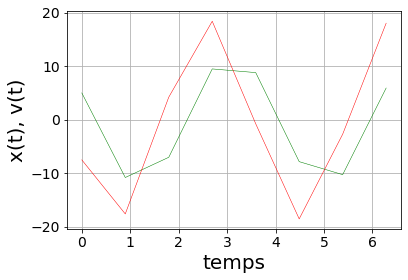

In [72]:
###############################################################################
# création de la fonction resoudre
def resoudre(x0,v0):
    ###########################################################################
    # Initialisation à 0 des variables, et Conditions initiales
    x = zeros(N)
    v = zeros(N)
    x[0] = x0
    v[0] = v0
    
###########################################################################
# Intégration "leapfrog"
        
    for i in range(N-1):
        v[i + 1] = v[i] - dt*x[i]*(v0/x0)**2
        x[i + 1] = x[i] + dt*v[i + 1]
           
###########################################################################
# Solution
    return x,v


# Programme principal et assignation de la fréquence fondamentale omg de la quantité x0  (condition initiale) du temps de 
# propagation tps et du pas d'intégration N
x0=5.0
omg=1.5
N = 8
tps=1.5*2*3.141596/omg

v0=-omg*x0
t = linspace(0,tps,N)
dt = t[1] - t[0]

x,v = resoudre(x0,v0) 

###############################################################################
# représentation graphique
rcParams["axes.grid"] = True
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 20
figure()
plt.plot(t,x,'g',linewidth=0.5)
plt.plot(t,v,'r',linewidth=0.5)
xlabel("temps")
ylabel("x(t), v(t)")

###############################################################################
show()
###############################################################################
